# Deliverable

By the deadline provided in the course shell, please complete the Jupyter notebook, convert it to PDF (In Chrome: File>Print>Save as PDF) and upload to the assignment folder.

Also upload the Jupyter Notebook document (File >Download > Download .ipynb)

**Note**: 10% penalty per day for late submission and after 72 hours 0 will be assigned

**Total mark**: 10 points

**Hint**: You can use codes of [Lab 5](https://github.com/tofighi/ITM760/blob/main/Lab5.ipynb) to complete the assignment

# Problem 1

Canadian Tire wants to start a word-of-mouth marketing campaign over Instagram for their new products. To do so, they need to select users and pay them to advertise the products. After careful investigation of Instagram users, they could come up with a network of potential users and their connections. However, due to the budget limitation they cannot ask all users to advertise the product. Therefore, they are looking for a solution to be able to only select 4 users to advertise the products. The following network (graph) represents users and the connections between users. In this network, each node is a user and each arrow show if a user i follows user j on Instagram. For example, user 𝑈1 follows user 𝑈3.


In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://github.com/tofighi/ITM760/raw/main/images/img1.png")

# Task 1
Given the above graph data, implement a python program for the following steps.


1.   (2 pints) Import this graph to Python and visualize the graph
2.   (3 points) Using the PageRank Algorithm find top-4 important users that Canadian Tire can target for advertising. 



['1:U1 = 4']
['2:U2 = 2']
['3:U3 = 3']
['4:U4 = 1']
['5:U5 = 1']
['6:U6 = 3']
['7:U7 = 3']
['8:U8 = 1']
['9:U9 = 3']


/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:474: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  label=label,


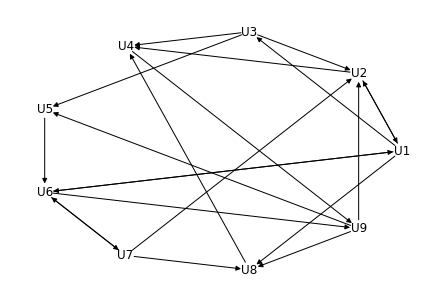

{'U1': 0.10296686801146343,
 'U2': 0.12018374777196283,
 'U3': 0.03854702328201588,
 'U4': 0.17154104240452384,
 'U5': 0.08360186245693552,
 'U6': 0.12431131091126674,
 'U7': 0.051888135326440606,
 'U8': 0.109262110772224,
 'U9': 0.19769789906316698}

In [2]:
#Task 1: 
#1. Importing the graph to Python and visualizing the graph
#Using networkx package to create the graph with the 'DiGraph' function
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
G_Altgeld=nx.DiGraph()

users = ["U1", "U2", "U3", "U4", "U5", "U6", "U7", "U8", "U9"]
G_Altgeld.add_nodes_from(users)

G_Altgeld.add_edges_from([('U1', 'U2'),('U1', 'U3'),('U1', 'U6'),('U1', 'U8'),
                          ('U2', 'U1'),('U2', 'U4'),
                          ('U3', 'U2'),('U3','U4'),('U3', 'U5'),
                          ('U4', 'U9'),
                          ('U5', 'U6'),
                          ('U6', 'U1'),('U6', 'U7'), ('U6', 'U9'),
                          ('U7', 'U2'),('U7', 'U6'),('U7', 'U8'),
                          ('U8', 'U4'),
                          ('U9', 'U2'),('U9', 'U5'),('U9', 'U8')])
i = 0
for name in users:
    i = i+1
    print(["%d:%s = %s"% (i,name,str(len(G_Altgeld.out_edges(name))))])
                
nx.draw_circular(G_Altgeld,node_color='', with_labels = True)
plt.show() # display
#2. Using the PageRank Algo find the top 4 important users for advertising
#Using sympy to calculate PageRank
nx.pagerank(G_Altgeld, max_iter=100)


### **The top 4 Users are U9, U4, U6, U2 as per the PageRank findings above.**

In [3]:
# I've tried using the Sympy to Calculate PageRank

import sympy as sp
sp.init_printing(use_unicode=True)

flowMat = sp.Matrix([[0,1/2,0,0,0,1/3,0,0,0], [1/4,0,1/3,0,0,0,1/3,0,1/3], 
                     [1/4,0,0,0,0,0,0,0,0], [0,1/2,1/3,0,0,0,0,1,0],
                     [0,0,1/3,0,0,0,0,0,1/3], [1/4,0,0,0,0,0,1/3,0,0],
                     [0,0,0,0,0,1/3,0,0,0], [1/4,0,0,0,0,0,1/3,0,1/3],
                     [0,0,0,1,0,1/3,0,0,0]])

rank = sp.Matrix([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
rank

⎡0.111111111111111⎤
⎢                 ⎥
⎢0.111111111111111⎥
⎢                 ⎥
⎢0.111111111111111⎥
⎢                 ⎥
⎢0.111111111111111⎥
⎢                 ⎥
⎢0.111111111111111⎥
⎢                 ⎥
⎢0.111111111111111⎥
⎢                 ⎥
⎢0.111111111111111⎥
⎢                 ⎥
⎢0.111111111111111⎥
⎢                 ⎥
⎣0.111111111111111⎦

In [4]:
rank = sp.Matrix([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
print(rank)
eps = 0.000000000000001
max_iter = 100
n=0
for i in range(max_iter):
  n = n+1
  temp = rank
  rank = flowMat*rank
  diff = np.linalg.norm(np.array(temp ,dtype=np.float32 )-np.array(rank ,dtype=np.float32))
  print(rank)
  if diff >  eps:
    print("steady rank is as follows after ", n, " stages", "for eps= ", eps, "\n", rank )
    break

Matrix([[0.111111111111111], [0.111111111111111], [0.111111111111111], [0.111111111111111], [0.111111111111111], [0.111111111111111], [0.111111111111111], [0.111111111111111], [0.111111111111111]])
Matrix([[0.0925925925925926], [0.138888888888889], [0.0277777777777778], [0.203703703703704], [0.0740740740740741], [0.0648148148148148], [0.0370370370370370], [0.101851851851852], [0.148148148148148]])
steady rank is as follows after  1  stages for eps=  1e-15 
 Matrix([[0.0925925925925926], [0.138888888888889], [0.0277777777777778], [0.203703703703704], [0.0740740740740741], [0.0648148148148148], [0.0370370370370370], [0.101851851851852], [0.148148148148148]])


##**I could not figure out how to get the steady rank to print as the 'diff' variable must have been greater than the 'eps'.**  So I had to make the 'diff' > 'eps' to print.

# Problem 2

After the first month of advertising new users are added to the network and some user are removed from the network. The following figure shows the updated network:

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://github.com/tofighi/ITM760/raw/main/images/img2.png")

# Task 2
Given the above graph data, implement a python program for the following steps.


1.   (2 points) Import this graph to Python and visualize the graph
2.   (3 points) Using the PageRank Algorithm find top-4 important users that Canadian Tire can target for advertising. Explain why you think these selected users are the best ones to be targeted.

['1:U1 = 4']
['2:U3 = 3']
['3:U4 = 0']
['4:U5 = 2']
['5:U6 = 1']
['6:U7 = 2']
['7:U8 = 1']
['8:U10 = 1']
['9:U11 = 1']


/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:474: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  label=label,


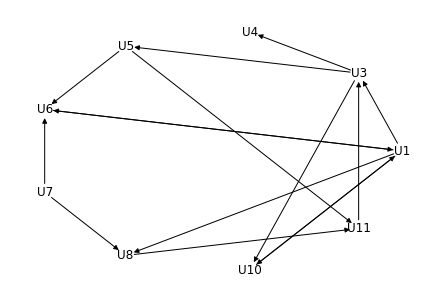

{'U1': 0.2203116995064982,
 'U10': 0.11996028851842672,
 'U11': 0.12300916068604215,
 'U3': 0.17494975012466604,
 'U4': 0.07314351317280714,
 'U5': 0.07314351317280714,
 'U6': 0.11149672613703404,
 'U7': 0.023574679272947284,
 'U8': 0.08041066940877126}

In [5]:
#Task 2: write your code here

G_Altgeld=nx.DiGraph()

users = ["U1", "U3", "U4", "U5", "U6", "U7", "U8", "U10", "U11"]
G_Altgeld.add_nodes_from(users)

G_Altgeld.add_edges_from([('U1', 'U3'),('U1', 'U6'),('U1', 'U8'),('U1', 'U10'),
                          ('U3', 'U4'),('U3', 'U5'),('U3', 'U10'),               
                          ('U5', 'U6'),('U5', 'U11'),
                          ('U6', 'U1'),
                          ('U7', 'U6'),('U7', 'U8'),
                          ('U8', 'U11'),
                          ('U10', 'U1'),
                          ('U11', 'U3')])
i = 0
for name in users:
    i = i+1
    print(["%d:%s = %s"% (i,name,str(len(G_Altgeld.out_edges(name))))])
                
nx.draw_circular(G_Altgeld,node_color='', with_labels = True)
plt.show() # display
#2. Using the PageRank Algo find the top 4 important users for advertising
#Using sympy to calculate PageRank
nx.pagerank(G_Altgeld, max_iter=100)

### **The top 4 Users are U1, U3, U11, U10 as per the PageRank findings above.**

# Task 3
Complete this following sentences:



1.   Top-4 important users of problem 1 are: 
2.   Top-4 important users of problem 2 are: 
3.   Explain why:



# 1. The Top-4 important users of problem 1 are: U2, U4, U6, U9
# 2. The Top-4 important users of problem 2 are: U1, U3, U11, U10
# 3. **Explaination:**  The reason why these top-4 users are the most important is because they have other important users connecting to them, hence increasing their importance or ranking.  For example, from problem 1, User 2 was the most important because they had the most connections from other important users (U1, U3, U7, U9). 

#Continuing with the example, User 4 was the second most important in problem 1 because they had connections from (U2 (the most important page), U3, U8).  User 4 had a higher imporance than User 6 because of the connection from User 2.

#The same could be said for problem 2 where User 1 is the most important because they also had the most connections from other important users (U6, U10). Users 6 and 10 seem to be important also as they have a few connections from other users.

##**By: Mohamed Hashi**